# Text to images with Stable Diffusion 2.1

The model used in this demo is licensed with a [CreativeML OpenRAIL++ license](https://huggingface.co/stabilityai/stable-diffusion-2/blob/main/LICENSE-MODEL). The authors of the model claim no rights on the outputs you generate, you are free to use them and are accountable for their use which must not go against the provisions set in this license. The license forbids you from sharing any content that violates any laws, produce any harm to a person, disseminate any personal information that would be meant for harm, spread misinformation and target vulnerable groups. For the full list of restrictions please read the license.

## Getting started
You first need to set up the environment and install some additional Python packages into it. Run the cells below by clcking on the play symbol on left side of the cell or by activating the cell and pressing SHIFT+ENTER on your keyboard.

First, please make sure you are using a GPU runtime to run this notebook, so inference is much faster. If the following command fails, use the `Runtime` menu above and select `Change runtime type`.

Installing the packages should take **a minute or so**.

In [4]:
!nvidia-smi

Sun Jan 15 16:42:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    30W /  70W |  13666MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install diffusers transformers accelerate scipy safetensors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.9 MB/s eta 0:00:00


## Loading the model

The trained model is hosted on [Hugging Face](https://huggingface.co/spaces/stabilityai/stable-diffusion). Running the cell below will set up things and download the trained model. **This should take some minutes.**

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Downloading:   0%|          | 0.00/539 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/633 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/939 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## Trying out the model

Now you can finally test generating some output. The `prompt` below specifies the input and running the cell will pass it to the model and finally display the generated content.

  0%|          | 0/50 [00:00<?, ?it/s]

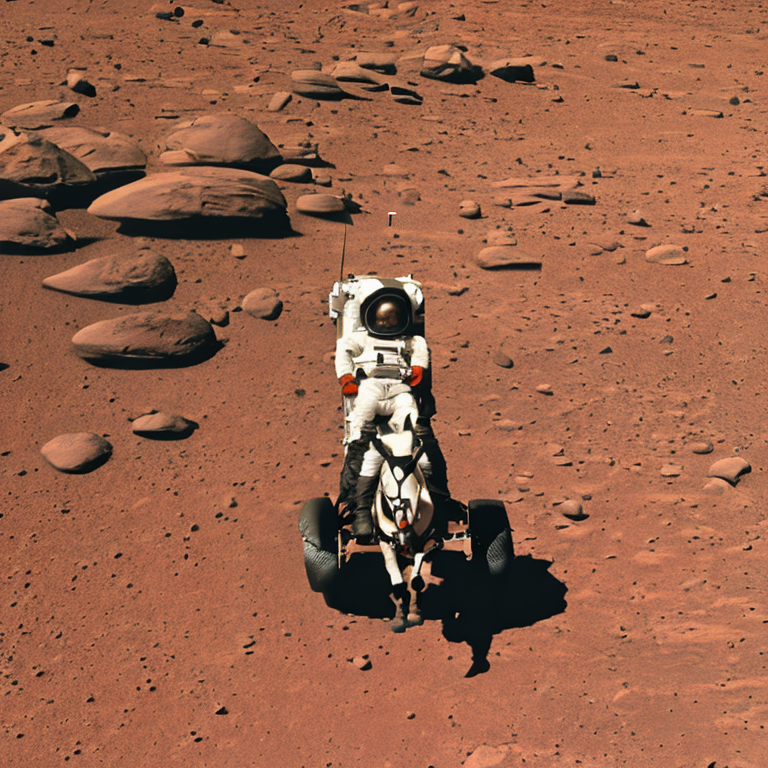

In [3]:
# The prompt is the text you input to the model, edit below
prompt = "a photo of an astronaut riding a horse on mars"

# Run Stabe Diffusion with the provided input
image = pipe(prompt).images[0]

# Display in Colab
image

# ... or save the output as a PNG   
#image.save("astronaut_rides_horse.png")

## More advanced use
The model takes several other inputs as well that can help tune the model output or inference speed.

  0%|          | 0/50 [00:00<?, ?it/s]

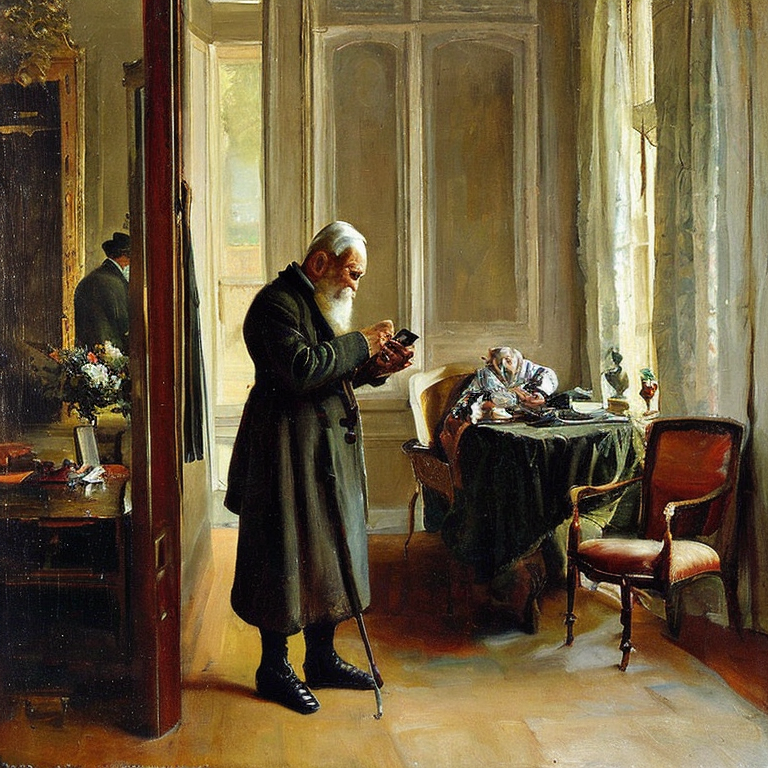

In [5]:
prompt = 'A painting by Albert Edelfelt of an old man checking his smartphone, oil on canvas, central composition, fine art, beautiful, artistic style'

negative_prompt = 'blender, cropped, lowres, poorly drawn face, out of frame, poorly drawn hands, blurry, bad art, blurred, text, watermark, disfigured, deformed, closed eyes'

generator = torch.Generator("cuda").manual_seed(1024)

guidance_scale = 7.5 # 7.5 is the default

num_inference_steps = 50 # 50 is the default

# Finally, pass the inputs to the model
image = pipe(prompt, negative_prompt=negative_prompt, guidance_scale=guidance_scale, 
             num_inference_steps=num_inference_steps, generator=generator).images[0]

# Display output in Colab
image